# Resproduçâo do artigo

# BinScatter PLot Código da Doc Oficcial

Ecnontrado apartir desse artigo: https://towardsdatascience.com/goodbye-scatterplot-welcome-binned-scatterplot-a928f67413e4

Link desse codigo: https://github.com/nppackages/binsreg/blob/master/Python/binsreg_illustration.py
        

In [1]:
################################################################################
# Binsreg: illustration file for Python
# Authors: M. D. Cattaneo, R. Crump, M. Farrell, Y. Feng and Ricardo Masini
# Last update: September 9, 2021
################################################################################

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from plotnine import *
from binsreg import *

In [3]:
######################################
###### Read the same data #############
####### used for STATA ################
#######################################

data = pd.read_csv("./bin-scatter/binsreg_sim.csv")
data.head()

,x,w,t,id,y,d
0,0.947232,0.683716,0,1,2.643492,1
1,0.052223,-0.040792,1,1,-1.270590,0
2,0.974318,-0.625972,1,2,0.782525,1
3,0.945748,0.857571,1,2,3.854583,1
4,0.185648,0.724756,1,3,1.724489,0


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x,1000.0,0.490707,0.293255,0.000228,0.229664,0.485280,0.746114,0.998581
w,1000.0,0.012022,0.579938,-0.999305,-0.494731,0.036793,0.490954,0.997320
t,1000.0,0.515000,0.500025,0.000000,0.000000,1.000000,1.000000,1.000000
id,1000.0,250.500000,144.409501,1.000000,125.750000,250.500000,375.250000,500.000000
y,1000.0,0.528388,1.727878,-5.159858,-0.596420,0.537530,1.777229,5.751276
d,1000.0,0.450000,0.497743,0.000000,0.000000,0.000000,1.000000,1.000000


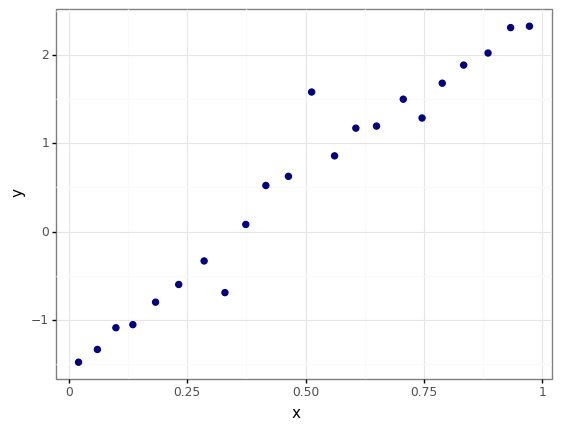

<ggplot: (135848472937)>

In [4]:
####################################
############# BINSREG ##############
####################################

# Default syntax
est = binsreg('y', 'x', 'w', data=data)
est.bins_plot

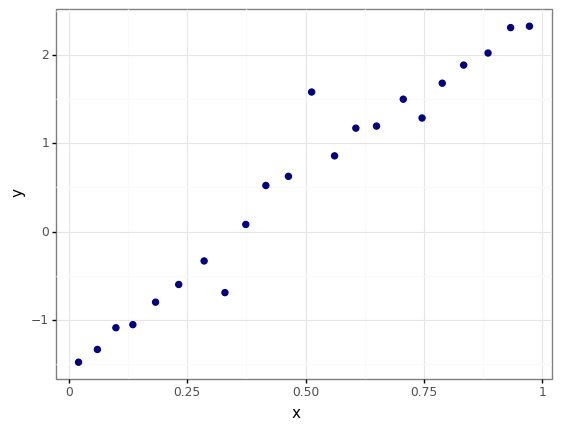

<ggplot: (135848434496)>

In [5]:
# Alternative: Specify y, x, w variables directly (without specifying a data frame)
y = data.y
x = data.x
w = data.w
est = binsreg(y, x, w)
est.bins_plot

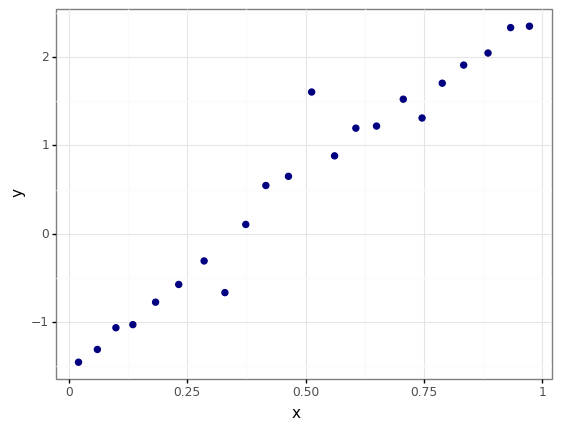

<ggplot: (135849342799)>

In [6]:
# Evaluate the estimated function at median of w rather than the mean
est = binsreg('y', 'x', 'w', at="median", data=data)
est.bins_plot

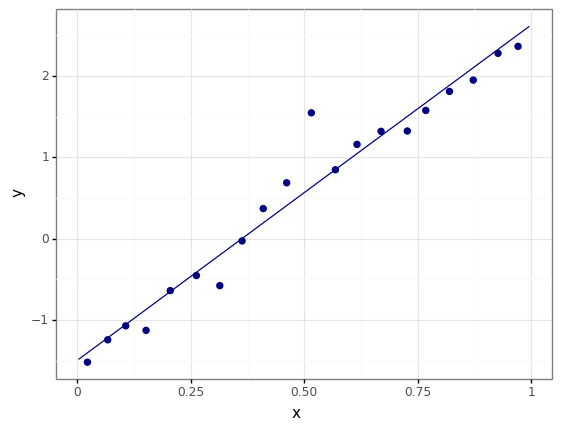

<ggplot: (135849023774)>

In [7]:
# Setting quantile-spaced bins to J=20, add a linear fit
est = binsreg('y', 'x', 'w', data=data, nbins=20, polyreg=1)
est.bins_plot

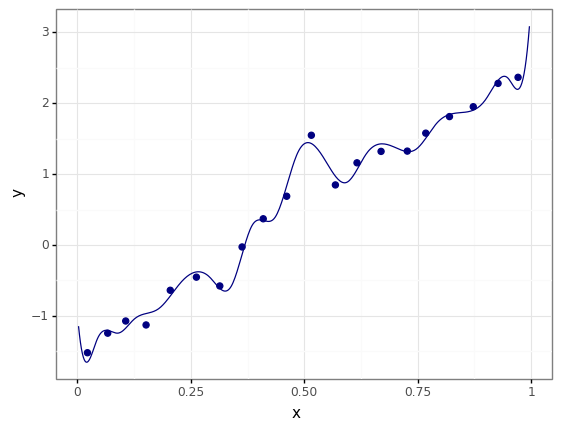

<ggplot: (135849449412)>

In [8]:
# Adding lines, ci, cb, polyreg
est = binsreg('y', 'x', 'w', data=data, nbins=20, line=(3,3))
est.bins_plot

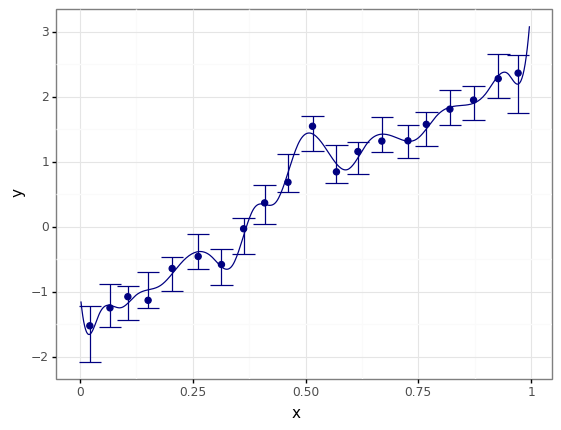

<ggplot: (135849347964)>

In [9]:
est = binsreg('y', 'x', 'w', data=data, nbins=20, line=(3,3), ci=(3,3))
est.bins_plot

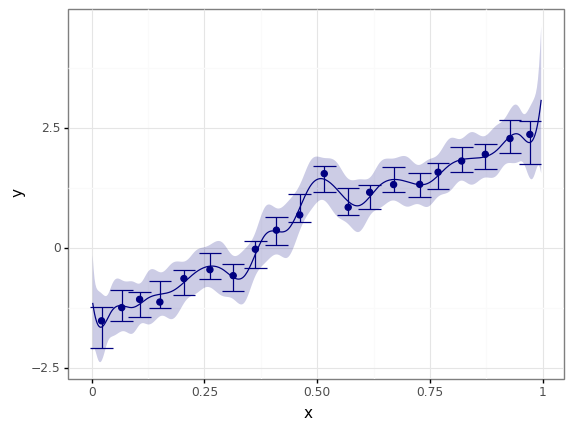

<ggplot: (135849547401)>

In [10]:
est = binsreg('y', 'x', 'w', data=data, nbins=20, line=(3,3), ci=(3,3), cb=(3,3))
est.bins_plot

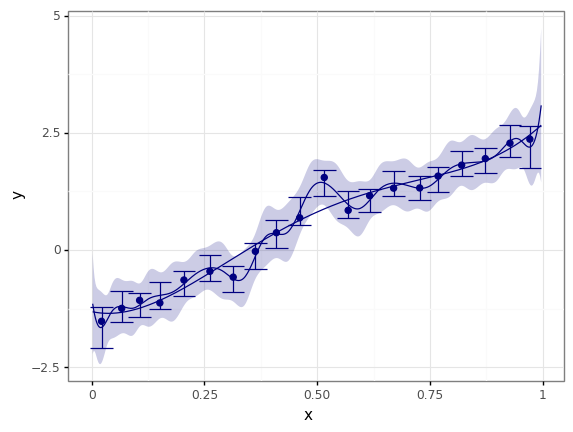

<ggplot: (135849731030)>

In [11]:
est = binsreg('y', 'x', 'w', data=data, nbins=20, line=(3,3), ci=(3,3), cb=(3,3), polyreg=4)
est.bins_plot

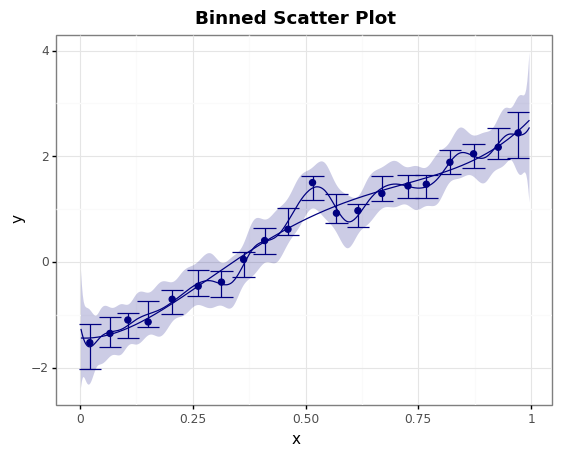

<ggplot: (135849558833)>

In [12]:
#  VCE option, ggplot object modification
est = binsreg('y', 'x', ['w', 't'], data=data, dots=(0,0), line=(3,3), ci=(3,3),
               cb=(3,3), polyreg=4, vce='HC1', cluster=data.id)
# Modify other ggplot features
est.bins_plot + ggtitle('Binned Scatter Plot') + theme(plot_title=element_text(hjust=0.5, vjust=0.5, face='bold'))

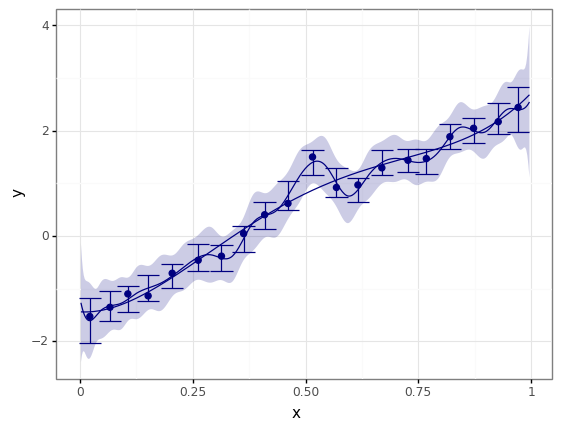

<ggplot: (135849588800)>

In [13]:
# CI and CB: alternative formula for standard errors (nonparametric component only)
est = binsreg('y', 'x', ['w', 't'], data=data, dots=(0,0), line=(3,3), ci=(3,3),
               cb=(3,3), polyreg=4, vce="HC1", cluster=data.id, asyvar=True)
est.bins_plot

In [14]:
# Comparison by groups
est = binsreg('y', 'x', 'w', data=data, by='t', line=(3,3), cb=(3,3),
               bycolors=("blue", "red"), bysymbols=('o','^'))

# Shut down all mass point checks to speed computation
est = binsreg('y', 'x', 'w', data=data, masspoints="off")

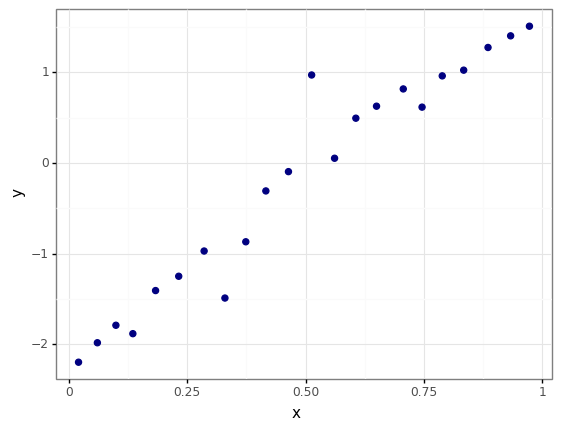

<ggplot: (135849621237)>

In [15]:
########################################
############# BINSQREG #################
########################################

# 0.25 quantile
est = binsqreg('y', 'x', 'w', data=data, quantile=0.25)
est.bins_plot

C:\Python310\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.


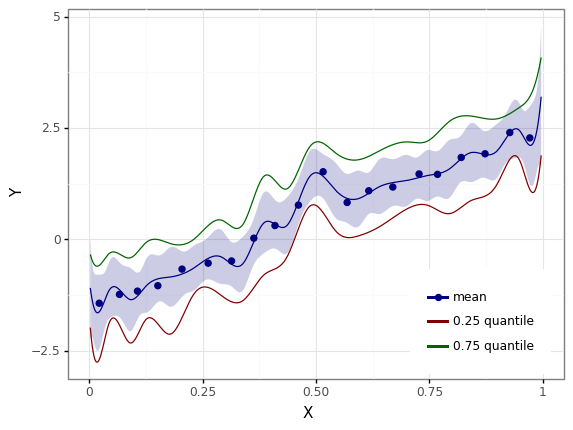

<ggplot: (135852901701)>

In [16]:
# Estimate 0.25 and 0.75 quantiles and combine them with the results from binsreg
est_25   = binsqreg('y', 'x', data = data, quantile=0.25, line=(3,3))
dat_25   = est_25.data_plot[0].line
dat_25.insert(0,"id","0.25 quantile")
est_75   = binsqreg('y', 'x', data=data, quantile=0.75, line=(3,3))
dat_75   = est_75.data_plot[0].line
dat_75.insert(0,"id","0.75 quantile")
est_mean = binsreg('y', 'x', data=data, line=(3,3), cb=(3,3))
dat_mean_dots = est_mean.data_plot[0].dots
dat_mean_line = est_mean.data_plot[0].line
dat_mean_cb   = est_mean.data_plot[0].cb
dat_mean_dots.insert(0,"id", "mean") 
dat_mean_line.insert(0,"id", "mean") 

fig = ggplot() + theme_bw() + labs(x="X", y="Y")
fig += theme(legend_position = (0.77,0.23),
             legend_title = element_blank(),
             legend_background = element_rect(fill = 'white'),
             legend_key = element_blank())
fig += geom_point(data=dat_mean_dots, mapping = aes(x ='x', y='fit', colour='id'), size=2)
fig += geom_line(data=dat_mean_line, mapping = aes(x ='x', y='fit', colour='id'))
fig += geom_ribbon(data=dat_mean_cb, mapping = aes(x ='x', ymin='cb_l', ymax='cb_r'), alpha=0.2, fill="navy")
fig += geom_line(data=dat_25, mapping = aes(x ='x', y='fit', colour='id'))
fig += geom_line(data=dat_75, mapping = aes(x ='x', y='fit', colour='id'))
fig += scale_color_manual(name="", values = ("navy", "maroon","darkgreen"),
                                     guide=guide_legend(override_aes = {    
                                        'linetype':["solid"]*3, 'shape':('o', 'None', 'None')}))
fig

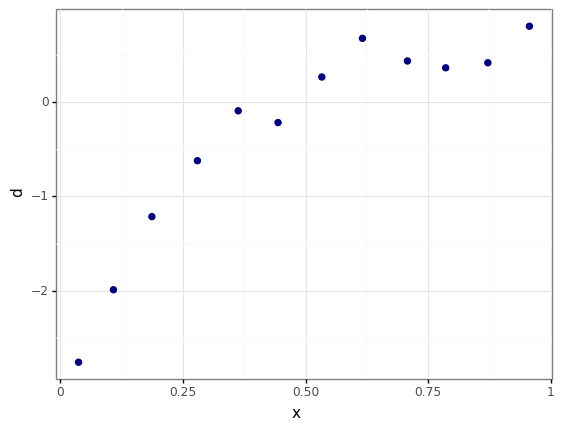

<ggplot: (135854140954)>

In [17]:
########################################
############# BINSGLM ##################
########################################

# Basic syntax: binscatter logistic regression
est = binsglm('d', 'x', 'w', data=data, dist = 'Binomial')
est.bins_plot

# Plot the function in the inverse link (logistic) function rather than the conditional probability
est = binsglm('d', 'x', 'w', data=data, dist = 'Binomial', nolink = True)
est.bins_plot

In [18]:
########################################
############# BINSTEST ##############
########################################
# basic syntax: linearity? (default method: least squares regression)
bstest = binstest('y', 'x', 'w', data=data, testmodelpoly=1)
print(bstest)

# Alternative: save parametric fit in another data frame or matrix; use L2 metric rather than sup
# If not available, first create by using binsregselect
bins = binsregselect('y','x','w', data=data, simsgrid=30, savegrid = True)
grid = bins.data_grid
grid.insert(0,'w', np.zeros(grid.shape[0]))
ols = smf.ols('y ~ x + w', data).fit()
ols_pred = ols.predict(grid)
model = np.column_stack((grid.x, ols_pred))

bstest = binstest('y', 'x', 'w', data=data, testmodelparfit=model, lp=2)
print(bstest)

Call: binstest

Sample size (n)                    =   1000           
# of distinct values (Ndist)       =   1000           
# of clusters (Nclust)             =   nan            
Estimation Method (estmethod)      =   least squares regression
Derivative (deriv)                 =   0              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   2              
  smooth (s)                       =   2              
  # of bins (nbins)                =   4              

Model Specification Tests:
degree (p) =  3 ; smooth (s) =  3
H0: mu =             sup |T|      p value
-----------------------------------------
poly. p=1              4.590        0.000
-----------------------------------------

Call: binstest

Sample size (n)                    =   1000           
# of distinct values (Ndist)       =   1000           
# of clusters (Nclust)             =   nan       

In [19]:
# Shape restriction test: increasing?
bstest = binstest('y', 'x', 'w', data=data, deriv=1, nbins=20, testshaper=0)
print(bstest)

Call: binstest

Sample size (n)                    =   1000           
# of distinct values (Ndist)       =   1000           
# of clusters (Nclust)             =   nan            
Estimation Method (estmethod)      =   least squares regression
Derivative (deriv)                 =   1              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   2              
  smooth (s)                       =   2              
  # of bins (nbins)                =   20             

Shape Restriction Tests:
degree (p) =  3 ; smooth (s) =  3
H0: inf mu >=          inf T      p value
-----------------------------------------
       0              -2.677        0.214
-----------------------------------------





In [20]:
# Test many things simultaneously
bstest = binstest('y', 'x', 'w', data=data, nbins=20, testshaper=(-2,0), testshapel=4,
                      testmodelpoly=1, nsims=1000, simsgrid=30)
print(bstest)

Call: binstest

Sample size (n)                    =   1000           
# of distinct values (Ndist)       =   1000           
# of clusters (Nclust)             =   nan            
Estimation Method (estmethod)      =   least squares regression
Derivative (deriv)                 =   0              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   2              
  smooth (s)                       =   2              
  # of bins (nbins)                =   20             

Shape Restriction Tests:
degree (p) =  3 ; smooth (s) =  3
H0: sup mu <=          sup T      p value
-----------------------------------------
       4              -1.662        1.000
-----------------------------------------


H0: inf mu >=          inf T      p value
-----------------------------------------
       -2              1.531        1.000
       0              -9.633        0.000
--------

In [21]:
# Quantile regression
# Median regression: linear?
bstest = binstest('y', 'x', 'w', data=data, estmethod="qreg", quantile=0.5, testmodelpoly=1)
print(bstest)

Call: binstest

Sample size (n)                    =   1000           
# of distinct values (Ndist)       =   1000           
# of clusters (Nclust)             =   nan            
Estimation Method (estmethod)      =   quantile regression
Derivative (deriv)                 =   0              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   2              
  smooth (s)                       =   2              
  # of bins (nbins)                =   4              

Model Specification Tests:
degree (p) =  3 ; smooth (s) =  3
H0: mu =             sup |T|      p value
-----------------------------------------
poly. p=1              3.445        0.012
-----------------------------------------



In [22]:
# Logistic Regression
# Shape restriction test: increasing?
bstest = binstest('d', 'x', 'w', data=data, estmethod="glm", dist='Binomial',
                     deriv=1, nbins=20, testshaper=0)
print(bstest)

Call: binstest

Sample size (n)                    =   1000           
# of distinct values (Ndist)       =   1000           
# of clusters (Nclust)             =   nan            
Estimation Method (estmethod)      =   generalized linear model
Derivative (deriv)                 =   1              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   2              
  smooth (s)                       =   2              
  # of bins (nbins)                =   20             

Shape Restriction Tests:
degree (p) =  3 ; smooth (s) =  3
H0: inf mu >=          inf T      p value
-----------------------------------------
       0              -1.534        0.928
-----------------------------------------





In [23]:
########################################
########### BINSPWC ####################
########################################

# Basic syntax
bsc = binspwc('y', 'x', 'w', data=data, by='t')
print(bsc)

Call: binspwc

Pairwise Group Comparison
Group Variable                     =   t
Estimation Method (estmethod)      =   least squares regression
degree (p)                         =   3              
smooth (s)                         =   3              
Derivative (deriv)                 =   0              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   2              
  smooth (s)                       =   2              

Group 1 vs. Group0
Group                           1            0
----------------------------------------------
Sample size                   515          485
# of distinct values          515          485
# of clusters                 nan          nan
# of bins                       4            5
----------------------------------------------

diff = Group 1 - Group 0
H0:                       sup |T|      p value
----------------------------

In [24]:
# Compare quantile regression functions
bsc = binspwc('y', 'x', 'w', data=data, by='t', estmethod="qreg", quantile=0.4)
print(bsc)

Call: binspwc

Pairwise Group Comparison
Group Variable                     =   t
Estimation Method (estmethod)      =   quantile regression
Quantile                           =   0.4
degree (p)                         =   3              
smooth (s)                         =   3              
Derivative (deriv)                 =   0              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   2              
  smooth (s)                       =   2              

Group 1 vs. Group0
Group                           1            0
----------------------------------------------
Sample size                   515          485
# of distinct values          515          485
# of clusters                 nan          nan
# of bins                       4            5
----------------------------------------------

diff = Group 1 - Group 0
H0:                       sup |T|    

In [25]:
########################################
########### BINSREGSELECT ##############
########################################
# Basic syntax
bins = binsregselect('y','x','w', data=data)
print(bins)

Call: binsregselect

Sample size (n)                    =   1000           
# of distinct values (Ndist)       =   1000           
# of clusters (Nclust)             =   nan            
Derivative (deriv)                 =   0              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   0              
  smooth (s)                       =   0              

method         # bins         df imse-bias^2   imse-var
-------------------------------------------------------
ROT-POLY           18         18      3.295      1.212
ROT-REGUL          18         18        nan        nan
ROT-UKNOT          18         18        nan        nan
DPI                22         22      5.576      1.190
DPI-UKNOT          22         22        nan        nan
-------------------------------------------------------



In [26]:
# J ROT specified manually and require evenly-spaced binning
bins = binsregselect('y','x','w', data=data, nbinsrot=20, binspos="es")
print(bins)

Call: binsregselect

Sample size (n)                    =   1000           
# of distinct values (Ndist)       =   1000           
# of clusters (Nclust)             =   nan            
Derivative (deriv)                 =   0              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Evenly-spaced  
  degree (p)                       =   0              
  smooth (s)                       =   0              

method         # bins         df imse-bias^2   imse-var
-------------------------------------------------------
ROT-POLY          nan        nan        nan        nan
ROT-REGUL          20         20        nan        nan
ROT-UKNOT          20         20        nan        nan
DPI                22         22      5.793      1.194
DPI-UKNOT          22         22        nan        nan
-------------------------------------------------------



In [27]:
# Save grid for prediction purpose
bins = binsregselect('y','x','w', data=data, simsgrid=30, savegrid = True)
grid = bins.data_grid

In [28]:
# Extrapolating the optimal number of bins to the full sample
bins = binsregselect('y','x','w', data=data, useeffn=1000, subset=(data.t==0))
print(bins)

Call: binsregselect

Sample size (n)                    =   485            
# of distinct values (Ndist)       =   485            
# of clusters (Nclust)             =   nan            
Derivative (deriv)                 =   0              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   0              
  smooth (s)                       =   0              

method         # bins         df imse-bias^2   imse-var
-------------------------------------------------------
ROT-POLY           20         20      3.185      0.937
ROT-REGUL          20         20        nan        nan
ROT-UKNOT          20         20        nan        nan
DPI                26         26      7.166      0.940
DPI-UKNOT          26         26        nan        nan
-------------------------------------------------------



In [29]:
# Use a random subsample to select the number of bins for the full sample
bins = binsregselect('y','x','w', data=data, randcut=0.3)
print(bins)

Call: binsregselect

Sample size (n)                    =   1000           
# of distinct values (Ndist)       =   1000           
# of clusters (Nclust)             =   nan            
Derivative (deriv)                 =   0              
Bin selection:
  Method (binsmethod)              =   IMSE direct plug-in
  Placement (binspos)              =   Quantile-spaced
  degree (p)                       =   0              
  smooth (s)                       =   0              

method         # bins         df imse-bias^2   imse-var
-------------------------------------------------------
ROT-POLY           18         18      3.060      1.222
ROT-REGUL          18         18        nan        nan
ROT-UKNOT          18         18        nan        nan
DPI                24         24      7.029      1.209
DPI-UKNOT          24         24        nan        nan
-------------------------------------------------------



In [30]:
################################################################################
# Binsreg: illustration file for plot
# Authors: M. D. Cattaneo, R. Crump, M. Farrell, Y. Feng and Ricardo Masini
# Last update: September 9, 2021
################################################################################

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from plotnine import *
from binsreg import *

######################################
###### Read the same data #############
####### used for STATA ################
#######################################

data = pd.read_csv("././bin-scatter/binsreg_sim.csv")
data.describe().T


########################################################
###### EXTERNAL PLOT USING BINSREG OUTPUT ##############
########################################################

# Run binsreg 
est = binsreg('y', 'x', 'w', data=data,line = (3,3), ci=(3,3), cb=(3,3), polyreg=4)

In [31]:
# Extract the plotting information
result = est.data_plot[0]

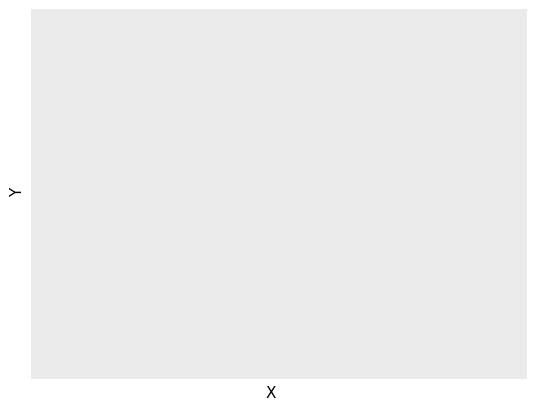

<ggplot: (135859820791)>

In [37]:
# Create the figure to plot
fig = ggplot() + labs(x='X',y ='Y')
fig

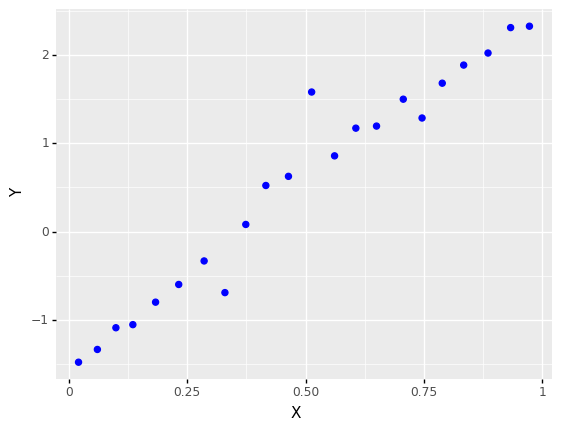

<ggplot: (135859820791)>

In [38]:
# Add the dots
fig += geom_point(data=result.dots, mapping=aes(x='x', y='fit'), color="blue", size=2, shape='o')
fig

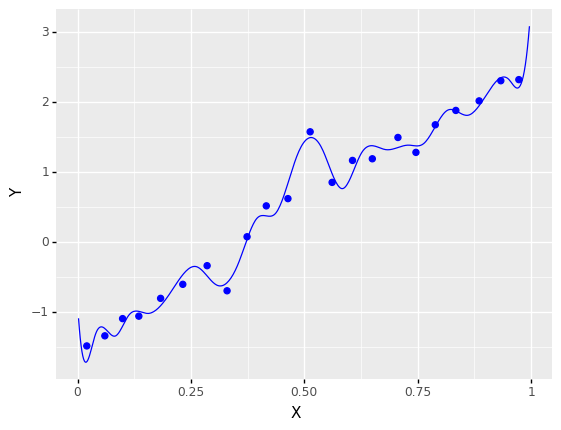

<ggplot: (135859820791)>

In [39]:
# Add the line
fig += geom_line(data=result.line, mapping=aes(x='x', y='fit'), color="blue", size=0.5)
fig

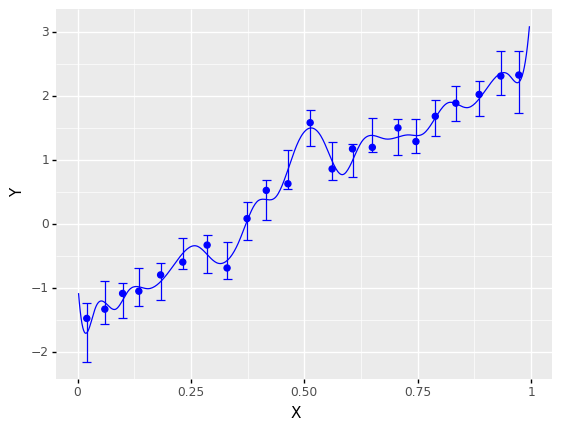

<ggplot: (135859820791)>

In [40]:
# Add the CI
fig += geom_errorbar(data=result.ci, mapping=aes(x='x', ymin='ci_l', ymax='ci_r'), color="blue", size=0.5, width = 0.02, linetype='solid')
fig

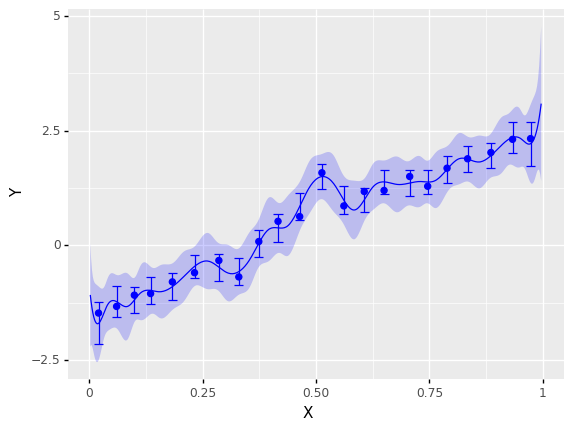

<ggplot: (135859820791)>

In [41]:
# Add the CB
fig += geom_ribbon(data=result.cb, mapping=aes(x='x', ymin='cb_l', ymax='cb_r'), fill="blue", alpha=0.2)
fig